In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dataurl='https://raw.githubusercontent.com/digipodium/Datasets/main/automobile.csv'
df=pd.read_csv(dataurl,index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
imputer=SimpleImputer()
cols=['normalized-losses','bore','stroke','horsepower','peak-rpm']
df[cols]=imputer.fit_transform(df[cols])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [10]:
df.dropna(inplace=True)

In [11]:
df.to_csv('processed_automobile.csv',index=False)

exploratory data analysis

- numerical

- categorical

In [12]:
df.describe(include=['int','float'])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.844221,121.869347,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331905,3.255536,10.114171,103.610615,5118.094165,25.130653,30.633166
std,1.259651,32.104045,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.448683,478.600838,6.408881,6.801746
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,99.500000,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000


In [13]:
import seaborn as sns

In [14]:
df['price']=df['price'].astype(float)

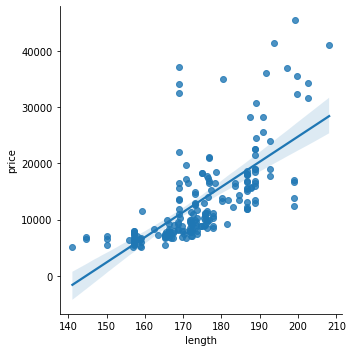

In [15]:
sns.lmplot(x='length',y='price',data=df)

In [16]:
df.corrwith(df['price']) #correlation with price

symboling           -0.083237
normalized-losses    0.136771
wheel-base           0.583842
length               0.691207
width                0.751628
height               0.133639
curb-weight          0.834059
engine-size          0.872152
bore                 0.542564
stroke               0.084327
compression-ratio    0.076095
horsepower           0.811000
peak-rpm            -0.101281
city-mpg            -0.690262
highway-mpg         -0.708139
price                1.000000
dtype: float64

<AxesSubplot:>

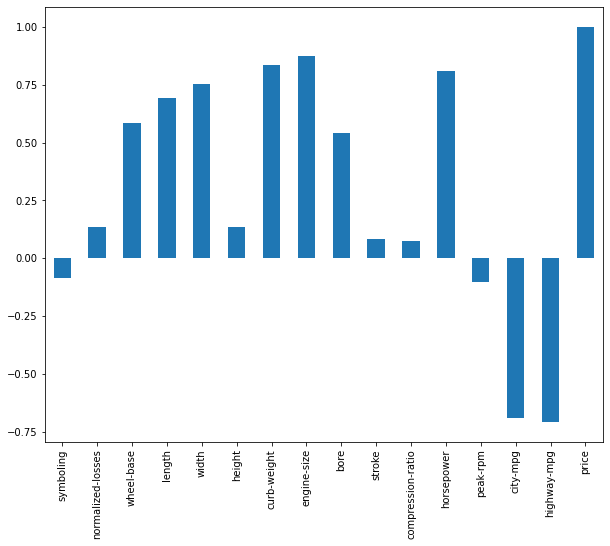

In [17]:
df.corrwith(df['price']).plot(kind='bar',figsize=(10,8))

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [19]:
numerical_cols=df.select_dtypes(include=['int','float']).columns.tolist()
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()

In [20]:
df[categorical_cols].nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

checking dependecy of each column with price whether the column is dependent for the price

<AxesSubplot:title={'center':'price'}, xlabel='fuel-type'>

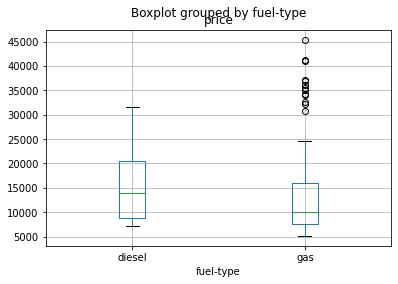

In [21]:
df.boxplot(column='price',by='fuel-type')

<AxesSubplot:title={'center':'price'}, xlabel='drive-wheels'>

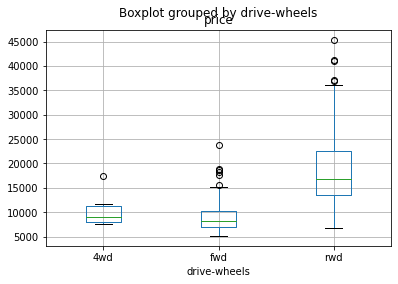

In [22]:
df.boxplot(column='price',by='drive-wheels')

<AxesSubplot:title={'center':'price'}, xlabel='body-style'>

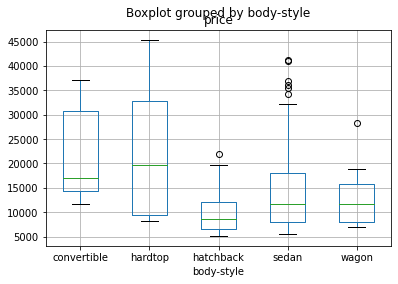

In [23]:
df.boxplot(column='price',by='body-style')

convert all the selected categorical columns to numerical using label encoder or onehot encoding

In [24]:
a=0
label_li=[]
onehot_li=[]
for i in range(len(categorical_cols)):
    a=len(df[categorical_cols[i]].value_counts().tolist())
    if(a<=2):
        label_li.append(categorical_cols[i])
    else:
        onehot_li.append(categorical_cols[i])
    a=0

print(label_li)
print(onehot_li)
    


['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
['make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [25]:
from sklearn.preprocessing import LabelEncoder
def labelencoding():
    label_variable=['fuel_enc','aspiration_enc','numofdoors_enc','engine_loc_enc']
    for i in range(len(label_variable)):
        label_variable[i]=LabelEncoder()
        label_variable[i].fit(df[label_li[i]])
        df[label_li[i]]=label_variable[i].transform(df[label_li[i]])

    print(df.head())
labelencoding()



   symboling  normalized-losses         make  fuel-type  aspiration  \
0          3              122.0  alfa-romero          1           0   
1          3              122.0  alfa-romero          1           0   
2          1              122.0  alfa-romero          1           0   
3          2              164.0         audi          1           0   
4          2              164.0         audi          1           0   

   num-of-doors   body-style drive-wheels  engine-location  wheel-base  \
0             1  convertible          rwd                0        88.6   
1             1  convertible          rwd                0        88.6   
2             1    hatchback          rwd                0        94.5   
3             0        sedan          fwd                0        99.8   
4             0        sedan          4wd                0        99.4   

   length  width  height  curb-weight engine-type num-of-cylinders  \
0   168.8   64.1    48.8         2548        dohc         

onehotencoding 

In [26]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc=['make_enc', 'body-style_enc', 'drive-wheels_enc', 'engine-type_enc', 'num-of-cylinders_enc', 'fuel-system_enc']
for i in range(len(onehot_enc)):
    onehot_enc[i]=OneHotEncoder(drop='first')
    onehot_enc[i].fit(df[[onehot_li[i]]])

In [27]:
from sklearn.preprocessing import OneHotEncoder
designation_dummies0=onehot_enc[0].transform(df[[onehot_li[0]]])
designation_dummies0 = designation_dummies0.toarray()
designation_dummies1=onehot_enc[1].transform(df[[onehot_li[1]]])
designation_dummies1 =designation_dummies1.toarray()
designation_dummies2=onehot_enc[2].transform(df[[onehot_li[2]]])
designation_dummies2 =designation_dummies2.toarray()
designation_dummies3=onehot_enc[3].transform(df[[onehot_li[3]]])
designation_dummies3 =designation_dummies3.toarray()
designation_dummies4=onehot_enc[4].transform(df[[onehot_li[4]]])
designation_dummies4 =designation_dummies4.toarray()
designation_dummies5=onehot_enc[5].transform(df[[onehot_li[5]]])
designation_dummies5 =designation_dummies5.toarray()
df.drop(columns=['make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system'],axis=1,inplace=True)
#print(df.head())
#print(df.values)


#now we add two numpy matrix
import numpy as np
data0=np.hstack((designation_dummies0,df.values))
data1=np.hstack((designation_dummies1,df.values))
data2=np.hstack((designation_dummies2,df.values))
data3=np.hstack((designation_dummies3,df.values))
data4=np.hstack((designation_dummies4,df.values))
data5=np.hstack((designation_dummies5,df.values))
print(data0.shape)
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)


(199, 41)
(199, 24)
(199, 22)
(199, 25)
(199, 26)
(199, 27)


In [28]:
desig_dummy_df0=pd.DataFrame(designation_dummies0)
desig_dummy_df1=pd.DataFrame(designation_dummies1)
desig_dummy_df2=pd.DataFrame(designation_dummies2)
desig_dummy_df3=pd.DataFrame(designation_dummies3)
desig_dummy_df4=pd.DataFrame(designation_dummies4)
desig_dummy_df5=pd.DataFrame(designation_dummies5)


print(desig_dummy_df0.head(),"\n")
print(desig_dummy_df1.head(),"\n")
print(desig_dummy_df2.head(),"\n")
print(desig_dummy_df3.head(),"\n")
print(desig_dummy_df4.head(),"\n")
print(desig_dummy_df5.head(),"\n")


    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0   

     0    1    2    3
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  1.0  0.0  0.0
3  0.0  0.0  1.0  0.0
4  0.0  0.0  1.0  0.0 

     0    1
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  1.0  0.0
4  0.0  0.0 

     0    1    2    3    4
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  0

In [29]:
data_df0=pd.concat([desig_dummy_df0,df],axis=1)
data_df1=pd.concat([desig_dummy_df1,data_df0],axis=1)
data_df2=pd.concat([desig_dummy_df2,data_df1],axis=1)
data_df3=pd.concat([desig_dummy_df3,data_df2],axis=1)
data_df4=pd.concat([desig_dummy_df4,data_df3],axis=1)
data_df=pd.concat([desig_dummy_df5,data_df4],axis=1)

print(data_df0.head())
print(data_df1.head())
print(data_df2.head())
print(data_df3.head())
print(data_df4.head())
print(data_df.head())

     0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20  symboling  normalized-losses  fuel-type  \
0  0.0  0.0  0.0  0.0  0.0  0.0        3.0              122.0        1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0        3.0              122.0        1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0        1.0              122.0        1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0        2.0              164.0        1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0        2.0              164.0        1.0   

   aspiration  num-of-doors  engine-location  wheel-base  leng

In [30]:
#we need to drop the first col
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mxScaler=MinMaxScaler()
mxScaler.fit(data_df)
scaled_data=mxScaler.transform(data_df)
print(scaled_data)

[[0.         0.         0.         ... 0.22222222 0.28947368 0.20795889]
 [0.         0.         0.         ... 0.22222222 0.28947368 0.28255797]
 [0.         0.         0.         ... 0.16666667 0.26315789 0.28255797]
 ...
 [       nan        nan        nan ... 0.13888889 0.18421053 0.40631051]
 [       nan        nan        nan ... 0.36111111 0.28947368 0.43076312]
 [       nan        nan        nan ... 0.16666667 0.23684211 0.43461099]]


C:\Users\ASUS\miniconda3\envs\digi1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\miniconda3\envs\digi1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
print(scaled_data)

[[0.         0.         0.         ... 0.22222222 0.28947368 0.20795889]
 [0.         0.         0.         ... 0.22222222 0.28947368 0.28255797]
 [0.         0.         0.         ... 0.16666667 0.26315789 0.28255797]
 ...
 [       nan        nan        nan ... 0.13888889 0.18421053 0.40631051]
 [       nan        nan        nan ... 0.36111111 0.28947368 0.43076312]
 [       nan        nan        nan ... 0.16666667 0.23684211 0.43461099]]


In [32]:
#for best coding 
stdscaler=StandardScaler()
stdscaler.fit(data_df)
scaled_data=stdscaler.transform(data_df)


C:\Users\ASUS\miniconda3\envs\digi1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ASUS\miniconda3\envs\digi1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
print(scaled_data)

[[-0.68853037 -0.12371791 -0.32489314 ... -0.64614575 -0.53549914
   0.03171378]
 [-0.68853037 -0.12371791 -0.32489314 ... -0.64614575 -0.53549914
   0.40930824]
 [-0.68853037 -0.12371791 -0.32489314 ... -0.95899978 -0.68289102
   0.40930824]
 ...
 [        nan         nan         nan ... -1.11542679 -1.12506667
   1.03570038]
 [        nan         nan         nan ...  0.13598931 -0.53549914
   1.15947095]
 [        nan         nan         nan ... -0.95899978 -0.8302829
   1.17894753]]


END OF PREPROCESSING(LABEL ENCODER AND ONEHOTENCODER)

In [34]:
selector=SelectKBest(score_func=mutual_info_regression,k=5)

In [35]:
selected_df=selector.fit_transform(df[numerical_cols[:-1]],df['price'])

In [36]:
selected_df.shape

(199, 5)

In [37]:
selector.get_feature_names_out()

array(['curb-weight', 'engine-size', 'horsepower', 'city-mpg',
       'highway-mpg'], dtype=object)

In [38]:
X=selected_df
y=df['price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)*100

82.80991473933234

In [40]:
pred=model.predict(X)

In [41]:
df['pred']=pred

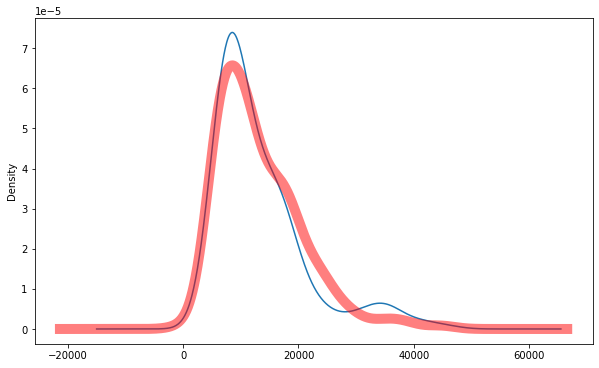

In [42]:
ax=df['price'].plot(kind='kde',figsize=(10,6))
df['pred'].plot(kind='kde',ax=ax,color='red',alpha=.5,linewidth=10)
plt.show()